In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

In [2]:
N, distributionsNumber = 1000, 10000
gamma = 0.95

In [3]:
class Sample:
    def __init__(self, generator, minThetaFunction, maxThetaFunction, theta, legend, title, yMin, yMax):
        self.data = np.array(generator(N))
        self.generator = generator
        self.minThetaFunction = minThetaFunction
        self.maxThetaFunction = maxThetaFunction
        self.theta = theta
        self.legend = legend
        self.title = title
        self.yMin = yMin
        self.yMax = yMax
        
    def plotInterval(self, gamma):
        figure = plt.figure(figsize=(20, 10))
        axis = figure.gca()
        minTheta = [self.minThetaFunction(self.data, gamma, n) for n in range(1, N + 1)]
        maxTheta = [self.maxThetaFunction(self.data, gamma, n) for n in range(1, N + 1)]
        axis.fill_between(range(1, N + 1), minTheta, maxTheta, label=self.legend)
        axis.set_ylim(self.yMin, self.yMax)
        axis.legend(loc="upper left", fontsize="26")
        axis.set_xlabel("n", fontsize="16")
        axis.set_ylabel(r"$\theta$", fontsize="20")
        axis.set_title(self.title, fontsize="16")

    def findProbability(self, ns):
        result = []
        for n in ns:
            counter = 0
            for i in range(distributionsNumber):
                data = self.generator(N)
                if self.minThetaFunction(data, gamma, n) < self.theta < self.maxThetaFunction(data, gamma, n):
                    counter += 1
            result.append("n = {}: {}".format(n, counter / distributionsNumber))
        print(result[0] + ", " + result[1])

Для выборки из $U(0,\theta)$ будем использовать разные статистики. Если использовать $\overline{X}$, то доверительный интервал $\theta$ уровня доверия $\gamma$ это $(\frac{2\overline{X}\sqrt{3n(1-\gamma)}}{\sqrt{3n(1-\gamma)}+1},\frac{2\overline{X}\sqrt{3n(1-\gamma)}}{\sqrt{3n(1-\gamma)}-1})$. Если использовать $X_{(n)}$, то $(X_{(n)},\frac{X_{(n)}}{\sqrt[n]{1-\gamma}})$. Если же использовать $X_{(1)}$, то $(X_{(1)}, \frac{X_{(1)}}{1-\sqrt[n]{\gamma}})$.

Для распределения $Pois(\theta)$, асимптотический доверительный интервал уровня $\gamma$ это $(\overline{X}-u_{\frac{\gamma+1}{2}}\sqrt{\frac{\overline X}{n}},\overline{X}+u_{\frac{\gamma + 1}{2}}\sqrt{\frac{\overline{X}}{n}})$, где $u_{\frac{\gamma+1}{2}}$ - квантиль стандартного нормального распределения уровня $\frac{\gamma+1}{2}$.

Для распределения $Cauchy(\theta,1)$, асимптотический доверительный интервал уровня $\gamma$ это $(\mu-\frac{\pi u_{\frac{\gamma+1}{2}}}{2\sqrt{n}},\mu+\frac{\pi u_{\frac{\gamma+1}{2}}}{2\sqrt{n}})$, где $u_{\frac{\gamma+1}{2}}$ - квантиль стандартного нормального распределения уровня $\frac{\gamma+1}{2}$, а $\mu$ - медиана.

Для распределения $Г(\theta, \lambda)$ при известном $\lambda$, асимптотический доверительный интервал уровня $\gamma$ это $(\frac{\lambda-u_{\frac{\gamma+1}{2}}\sqrt{\frac{\lambda}{n}}}{\overline{X}},\frac{\lambda+u_{\frac{\gamma+1}{2}}\sqrt{\frac{\lambda}{n}}}{\overline{X}})$, где $u_{\frac{\gamma+1}{2}}$ - квантиль стандартного нормального распределения уровня $\frac{\gamma+1}{2}$.

Введем обозначение $\widehat{\lambda}=\frac{\overline{X}^2}{\overline{X^2}-\overline{X}^2}$, $\widehat{\theta}=\frac{\overline{X}}{\overline{X^2}-\overline{X}^2}$,
$r=\left(\begin{array}{cc}\frac{\widehat{\theta}^2}{\widehat{\lambda}}+2\widehat{\theta}^2\\-\frac{\widehat{\theta}^3}{\widehat{\lambda}}\end{array}\right)$,
$\Sigma=\left(\begin{array}{cc}\frac{\widehat{\theta}^2}{\widehat{\lambda}}&\frac{2(\widehat{\lambda}^2+\widehat{\lambda})}{\widehat{\theta^3}}\\\frac{2(\widehat{\lambda}^2+\widehat{\lambda})}{\widehat{\theta^3}}&\frac{\widehat{\lambda}(\widehat{\lambda}+1)(4\widehat{\lambda}+6)}{\widehat{\theta}^4}\end{array}\right)$

Для распределения $Г(\theta, \lambda)$ при неизвестном $\lambda$ , асимптотический доверительный интервал уровня $\gamma$ это $(\widehat{\theta}+\frac{u\sigma}{\sqrt{n}}, \widehat{\theta}-\frac{u\sigma}{\sqrt{n}})$, где $u_{\frac{\gamma+1}{2}}$ - квантиль стандартного нормального распределения уровня $\frac{\gamma+1}{2}$, а $\sigma$ определяется по формуле $\sigma^2=r^T\Sigma r$

In [4]:
# Задаем все выборки

samples = []
u = st.norm.ppf((gamma + 1) / 2)

samples.append(
    Sample(
        (lambda n: np.random.uniform(0, 1, n)),
        (lambda data, gamma, n: 2 * np.mean(data[:n]) * np.sqrt(3 * n * (1 - gamma)) /
            (1 + np.sqrt(3 * n * (1 - gamma)))),
        (lambda data, gamma, n: 2 * np.mean(data[:n]) * np.sqrt(3 * n * (1 - gamma)) /
            (np.sqrt(3 * n * (1 - gamma)) - 1)),
        1,
        r"$(\frac{2\overline{X}\sqrt{3n(1-\gamma)}}{\sqrt{3n(1-\gamma)}+1},\frac{2\overline{X}\sqrt{3n(1-\gamma)}}{\sqrt{3n(1-\gamma)}-1})$",
        r"$R(0,\theta)$ using $\overline{X}$",
        0.5, 1.5
    )
)
samples.append(
    Sample(
        (lambda n: np.random.uniform(0, 1, n)),
        (lambda data, gamma, n: np.min(data[:n])),
        (lambda data, gamma, n: np.min(data[:n]) / (1 - gamma ** (1 / n))),
        1,
        r"$(X_{(n)},\frac{X_{(n)}}{(1-\gamma)^{\frac{1}{n}}})$",
        r"$R(0,\theta)$ using $X_{(n)}$",
        0, 90
    )
)
samples.append(
    Sample(
        (lambda n: np.random.uniform(0, 1, n)),
        (lambda data, gamma, n: np.max(data[:n])),
        (lambda data, gamma, n: np.max(data[:n]) / ((1 - gamma) ** (1 / n))),
        1,
        r"$(X_{(1)},\frac{X_{(1)}}{1-\gamma^{\frac{1}{n}}})$",
        r"$R(0,\theta)$ using $X_{(1)}$",
        0.9, 1.1
    )
)
samples.append(
    Sample(
        (lambda n: np.random.poisson(1, n)),
        (lambda data, gamma, n: np.mean(data[:n]) - u * np.sqrt(np.mean(data[:n]) / n)), 
        (lambda data, gamma, n: np.mean(data[:n]) + u * np.sqrt(np.mean(data[:n]) / n)),
        1,
        r"$(\overline{X}-u\sqrt{\frac{\overline{X}}{n}},\overline{X}+u\sqrt{\frac{\overline{X}}{n}})$",
        r"$Pois(\theta)$",
        0, 2
    )
)
samples.append(
    Sample(
        (lambda n: np.random.standard_cauchy(n) + 1),
        (lambda data, gamma, n: np.median(data[:n]) - np.pi * u / (2 * np.sqrt(n))), 
        (lambda data, gamma, n: np.median(data[:n]) + np.pi * u / (2 * np.sqrt(n))),
        1,
        r"$(\mu-\frac{\pi u}{2\sqrt{n}},\mu+\frac{\pi u}{2\sqrt{n}})$",
        r"$Cauchy(\theta,1)$",
        -1, 2
    )
)
gammaLambda = 1
samples.append(
    Sample(
        (lambda n: np.random.gamma(gammaLambda, 1 / 10, n)),
        (lambda data, gamma, n: (gammaLambda - u * np.sqrt(gammaLambda / n)) / np.mean(data[:n])),
        (lambda data, gamma, n: (gammaLambda + u * np.sqrt(gammaLambda / n)) / np.mean(data[:n])),
        10,
        r"$(\frac{\lambda-u\sqrt{\frac{\lambda}{n}}}{\overline{X}},\frac{\lambda-u\sqrt{\frac{\lambda}{n}}}{\overline{X}})$",
        r"$Г(\theta,\lambda)$",
        5, 15
    )
)

def getThetaAndSigma(data, gamma, n):
    lambdaEvaluation = np.mean(data[:n]) ** 2 / (np.mean(np.array(data[:n]) ** 2) - np.mean(data[:n]) ** 2)
    thetaEvaluation = np.mean(data[:n]) / (np.mean(np.array(data[:n]) ** 2) - np.mean(data[:n]) ** 2)
    r = [
        thetaEvaluation ** 2 / lambdaEvaluation + 2 * thetaEvaluation ** 2,
        -thetaEvaluation ** 3 / lambdaEvaluation
    ]
    sigmaMatrix = [
        [
            lambdaEvaluation / thetaEvaluation ** 2,
            2 * (lambdaEvaluation + lambdaEvaluation ** 2) / thetaEvaluation ** 3
        ],
        [
            2 * (lambdaEvaluation + lambdaEvaluation ** 2) / thetaEvaluation ** 3,
            lambdaEvaluation * (1 + lambdaEvaluation) * (4 * lambdaEvaluation + 6) / thetaEvaluation ** 4
        ]
    ]
    sigma = np.sqrt(
        sigmaMatrix[0][0] * r[0] ** 2 +
        (sigmaMatrix[0][1] + sigmaMatrix[1][0]) * r[0] * r[1] +
        sigmaMatrix[1][1] * r[1] ** 2
    )
    return thetaEvaluation, sigma

def minFunction(data, gamma, n):
    theta, sigma = getThetaAndSigma(data, gamma, n)
    return theta - u * sigma / np.sqrt(n)

def maxFunction(data, gamma, n):
    theta, sigma = getThetaAndSigma(data, gamma, n)
    return theta + u * sigma / np.sqrt(n)

samples.append(
    Sample(
        (lambda n: np.random.gamma(1, 1 / 10, n)),
        minFunction,
        maxFunction,
        10,
        r"$(\widehat{\theta}+\frac{u\sigma}{\sqrt{n}}, \widehat{\theta}-\frac{u\sigma}{\sqrt{n}})$",
        r"$Г(\theta,\lambda)$ with unknown \lambda",
        5, 15
    )
)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:77: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:78: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:80: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:81: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:85: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:86: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:89: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:90: RuntimeWarning: invalid value encountered in double_scalars


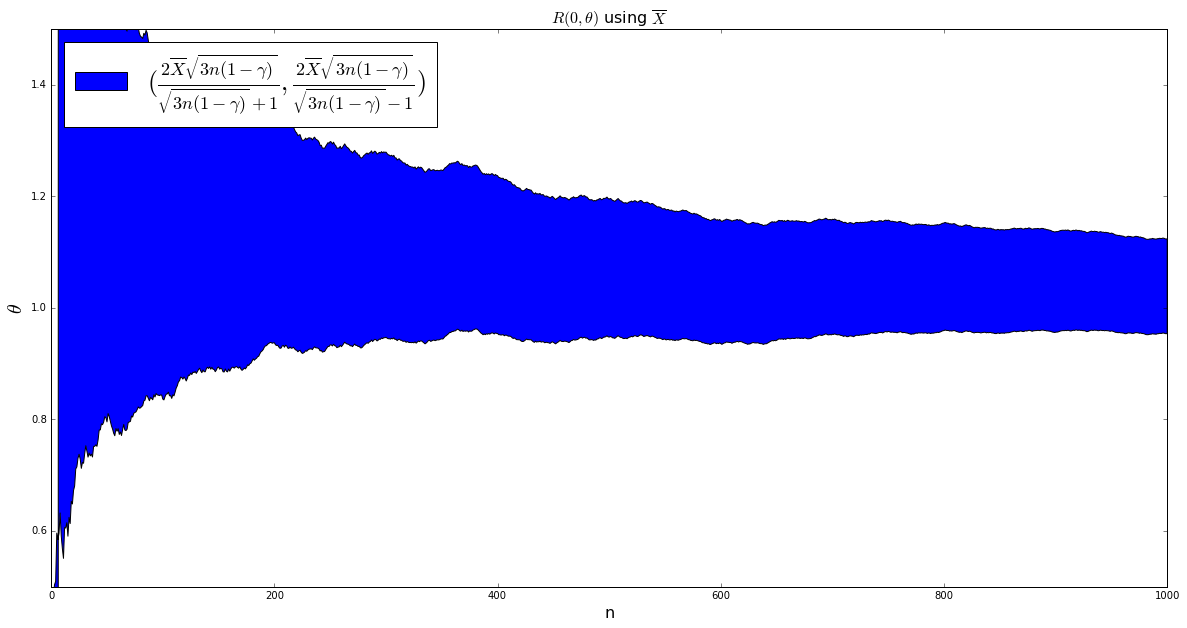

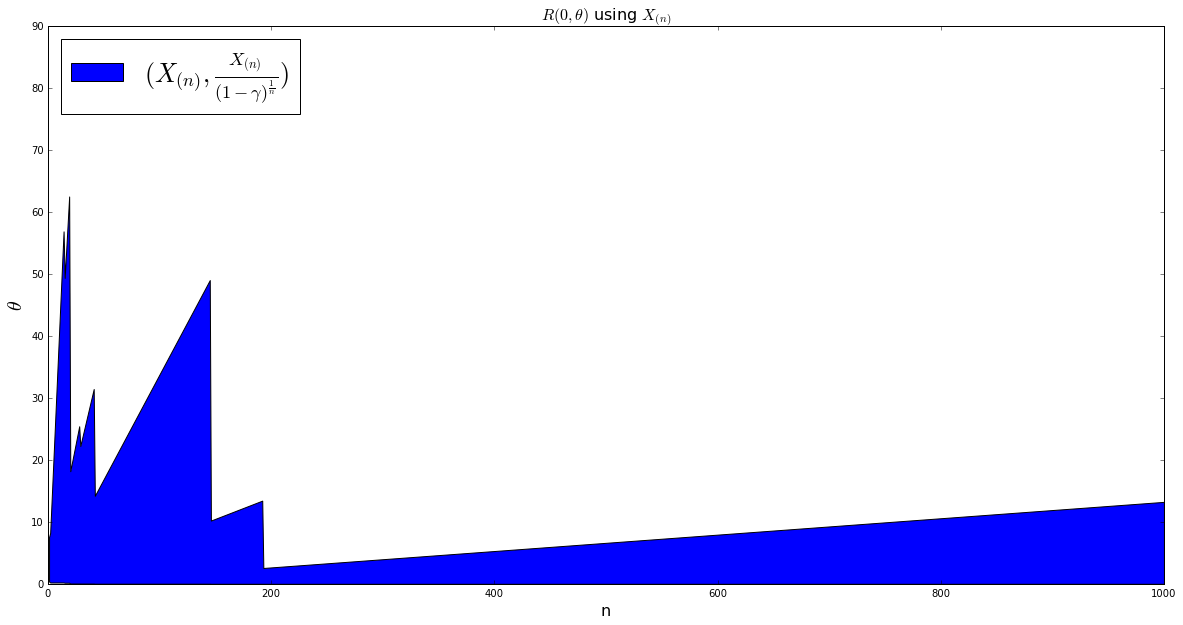

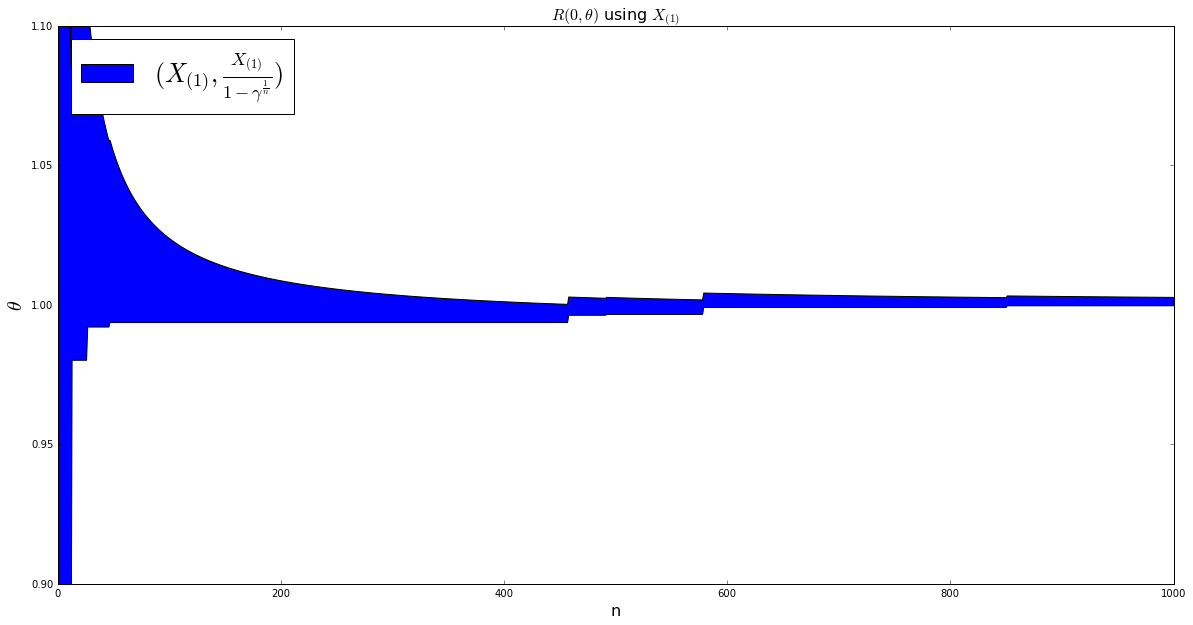

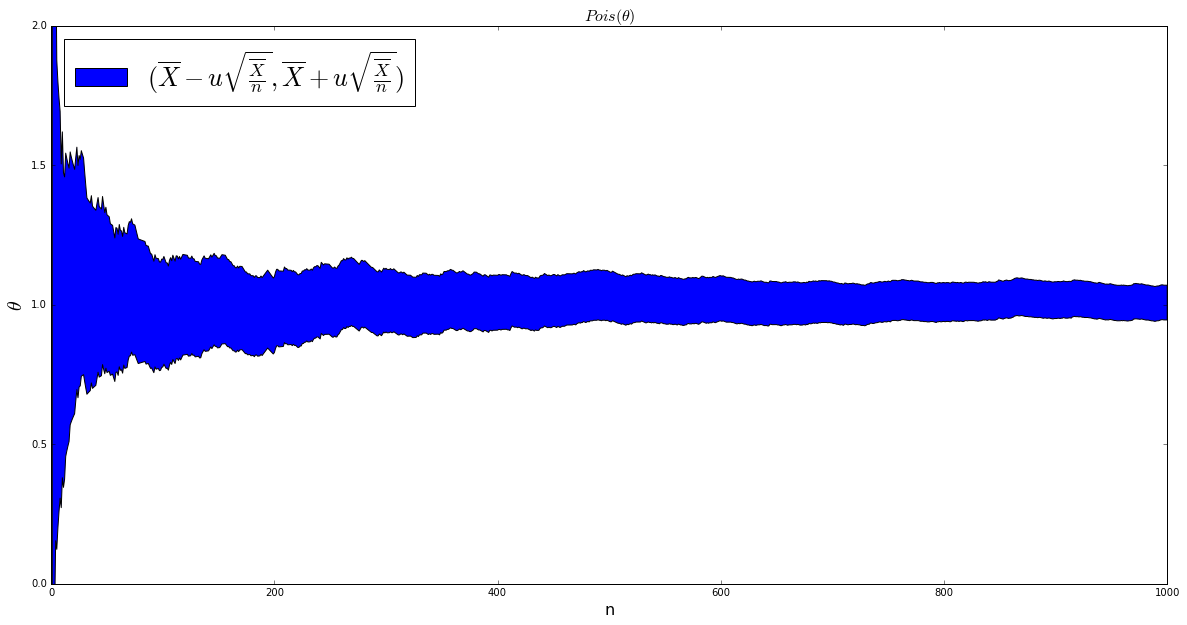

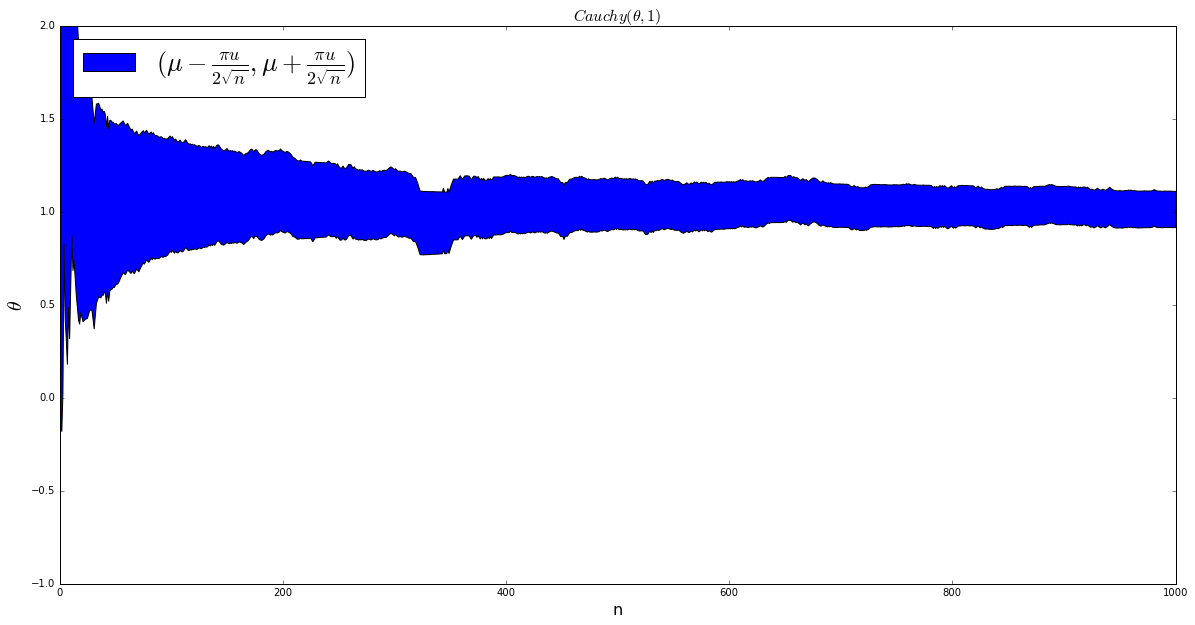

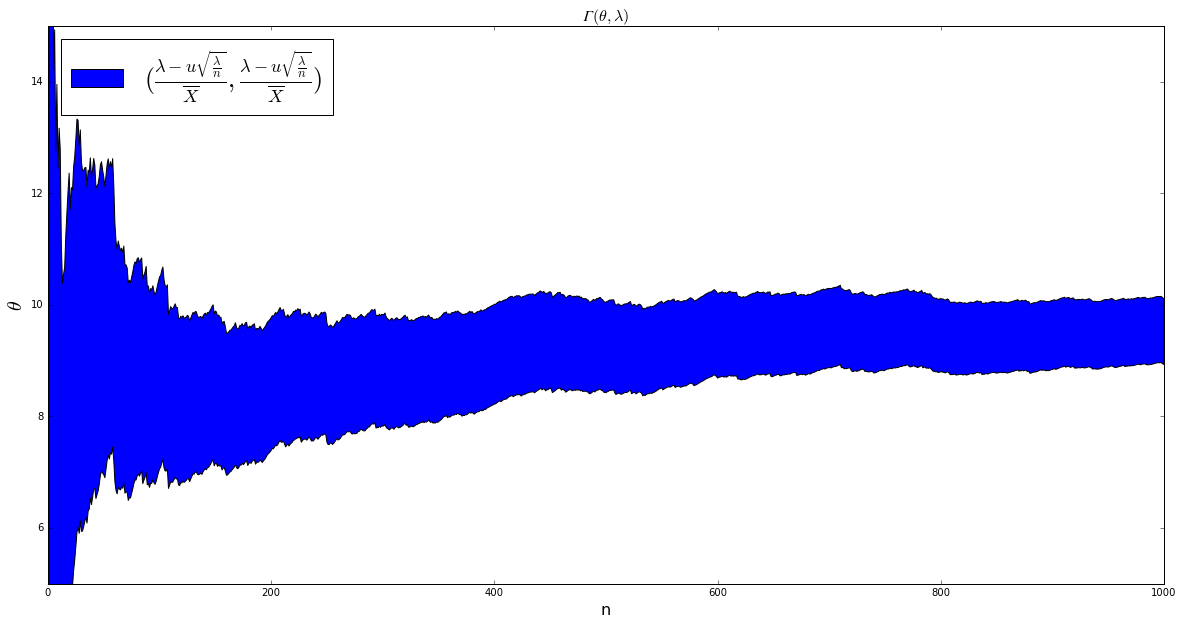

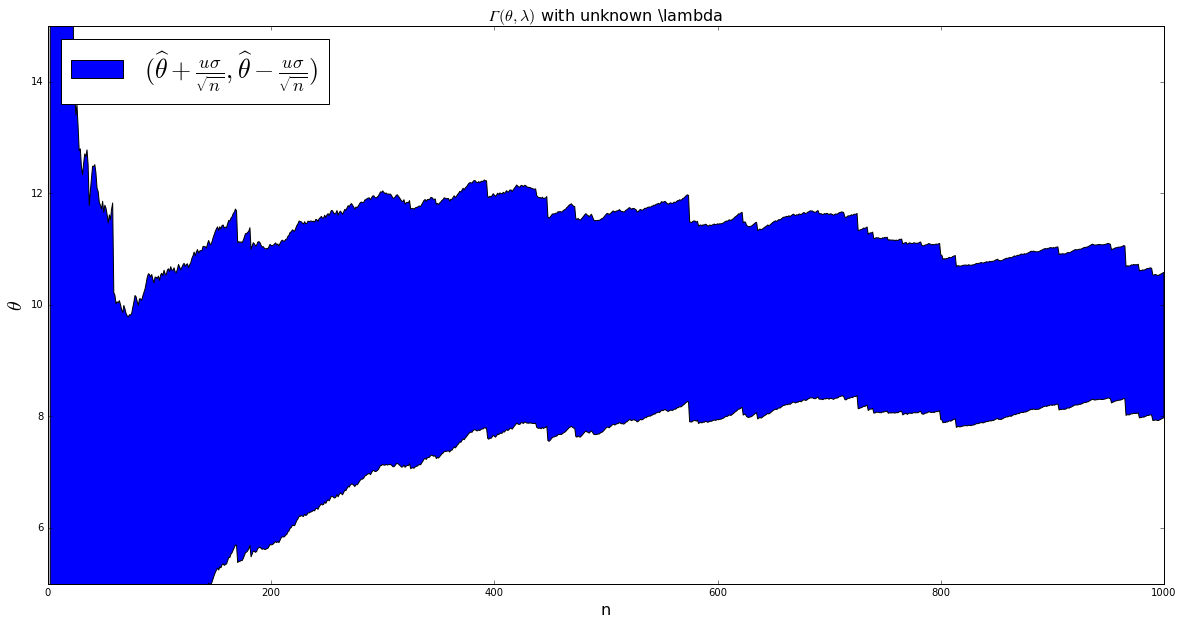

In [5]:
# Строим графики доверительных интервалов для всех выборок

# Тут какие-то ошибки с делением на ноль и еще какой-то фигней.
# Главное, что работает и можно проанализировать данные :)

for sample in samples:
    sample.plotInterval(gamma)

Все, графики, не использующие статистик $X_{(n)}$ и $X_{(1)}$ выглдят достаточно правдоподобно. Интересно, что из всех доверительных интервалов, наиболее узким из всех оказался интервал, использующий статистику $X_{(1)}$, а наиболее широким, использующий статистику $X_{(n)}$.

Сгенерируем рандомных выборок столько, чтобы их было много, а время работы было разумное.

In [6]:
for sample in samples:
    sample.findProbability([10, 100])

n = 10: 1.0, n = 100: 1.0
n = 10: 0.9493, n = 100: 0.9459
n = 10: 0.9489, n = 100: 0.9524
n = 10: 0.9247, n = 100: 0.9456
n = 10: 0.9139, n = 100: 0.9477
n = 10: 0.9574, n = 100: 0.9483
n = 10: 0.9918, n = 100: 0.9624


Из посчитаных вероятностей видно, что доверительный интервал для равномерно распределения, использующий статистику $\overline{X}$ является избыточно широким для выбранных $n$, так как вероятность попадения в него $\theta$ практически совпадает с $1$. Последний интервал тоже излишне широк, хотя вероятность $1$ не достигает, она все равно заметно больше выбранного $\gamma$. Остальные доверительные интервалы лучше соответствуют $\gamma$. Естественно наблюдение, что при больших $n$ вероятность приближается к $\gamma$. Такими вычислениями можно для каждого интервала оценить мощность выборки $n$ при которой его уже целесобразно использовать.